<h2 style="font-weight: bold;">Explore data </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

df = pd.read_csv('cleaned_data.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61742 entries, 0 to 61741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Game Title         61742 non-null  object 
 1   Game Genre         61742 non-null  object 
 2   Pricing            61742 non-null  float64
 3   Developer          61742 non-null  object 
 4   Release Date       61742 non-null  object 
 5   Platform           61742 non-null  object 
 6   Rating             61742 non-null  float64
 7   Number of Ratings  61742 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 3.8+ MB


,Game Title,Game Genre,Pricing,Developer,Release Date,Platform,Rating,Number of Ratings
0,! That Bastard Is Trying To Steal Our Gold !,"Action, Adventure, Casual, Indie",2.99,WTFOMGames,Mar 1 2016,PC,56.0,66
1,! Wild Russia !,"Action, Adventure, Casual",19.99,Andreev Worlds,Apr 28 2020,PC,61.0,60
2,!4RC4N01D!,Arcade,0.00,armogames,"Jan 12, 2018",PC,40.0,7
3,!4RC4N01D! 2: Retro Edition,Arcade,0.00,armogames,"Feb 6, 2018",PC,38.0,7
4,!4RC4N01D! 3: Cold Space,Arcade,0.00,armogames,"Mar 8, 2018",PC,30.0,7


### Meaning of each column

- Game Title: Title of the game
- Game Genre: Genre(s) of the game
- Pricing: Price of the game in USD
- Developer': Developer of the game
- Release Date: Release date of the game
- Platform: Platform on which the game is available
- Rating: Rating of the game
- Number of Ratings: Number of ratings received by the game

In [2]:
print("Data Types:")
print(df.dtypes)

Data Types:
Game Title            object
Game Genre            object
Pricing              float64
Developer             object
Release Date          object
Platform              object
Rating               float64
Number of Ratings      int64
dtype: object


### Distribution of Values for Each Column
Display the distribution of values for each column using descriptive statistics and visualizations.


Descriptive Statistics for Numerical Columns:
            Pricing        Rating  Number of Ratings
count  61742.000000  61742.000000       61742.000000
mean       7.696369     75.535470         768.549772
std       13.995889     17.549528        3099.924878
min        0.000000      2.000000           7.000000
25%        0.000000     66.000000          17.000000
50%        3.990000     79.000000          43.000000
75%        9.990000     89.000000         186.000000
max      299.900000    100.000000       24635.000000

Descriptive Statistics for Object Columns:
                                          Game Title     Game Genre Developer  \
count                                          61742          61742     61742   
unique                                         61742           1964     33748   
top     ! That Bastard Is Trying To Steal Our Gold !  Action, Indie  Nintendo   
freq                                               1           2528       205   

       Release Date Platfo

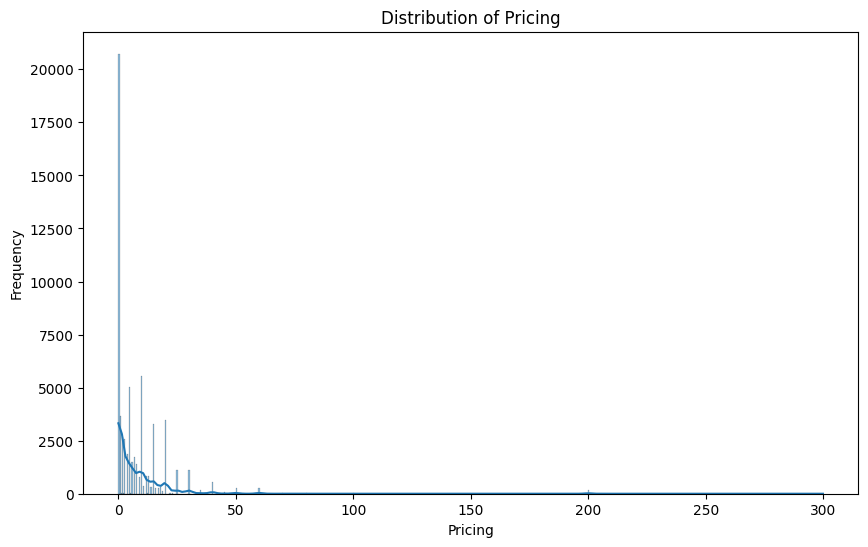

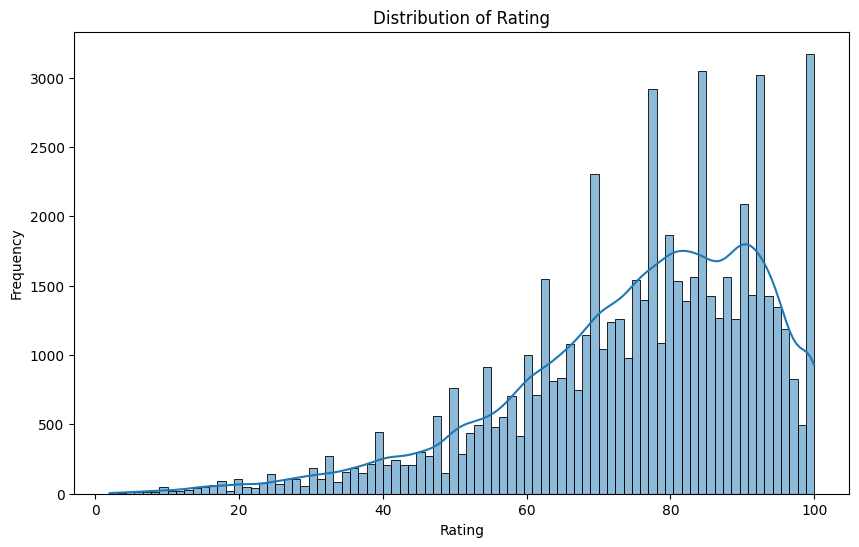

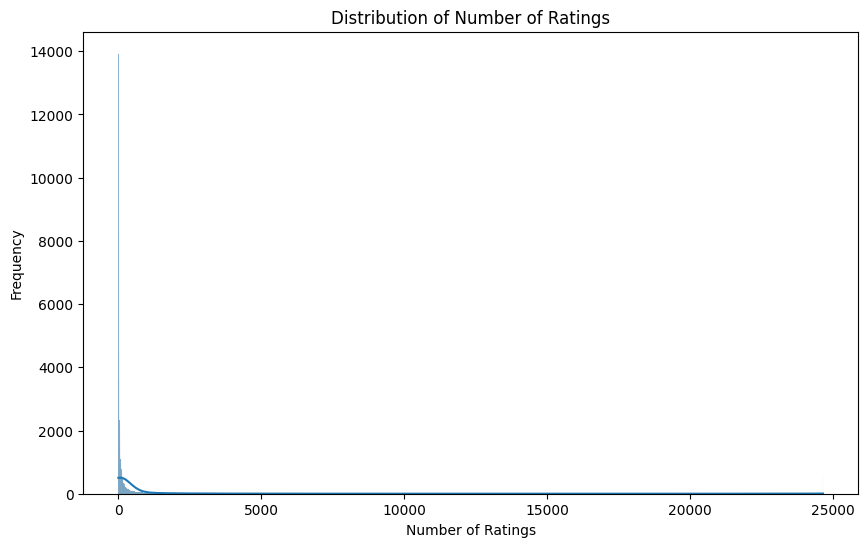

In [3]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

print("\nDescriptive Statistics for Object Columns:")
print(df.describe(include=[object]))

numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


- Pricing: The histogram clearly shows a skewed distribution of pricing, with a long tail extending to the right. This indicates that:
  - Most products are low-priced: A significant portion of products are clustered in the lower price range, suggesting a market dominated by budget-friendly options.
  - A few high-priced outliers: There are a small number of products with exceptionally high prices, which could be premium or luxury items.
  - Price Sensitivity: The market appears to be highly price-sensitive, with a concentration of products in the lower price brackets.
  - Competitive Landscape: The presence of numerous low-priced products suggests a competitive market where businesses are vying for customers through aggressive pricing.
  - Product Differentiation: The high-priced outliers indicate that there is a segment of the market willing to pay a premium for unique or high-quality products.
  - The distribution could reflect the target market for the products. If the target market is price-sensitive, there will be a higher concentration of low-priced items.
  - Companies may adopt different pricing strategies to differentiate their products and target specific market segments.
- Rating: The histogram clearly shows a skewed distribution of ratings, with a long tail extending to the left. This indicates that:
  - Most ratings are positive: A significant portion of ratings are clustered in the higher end of the scale, suggesting that overall, customers are satisfied with the product or service.
  - A few low ratings: There are a smaller number of lower ratings, indicating that there might be areas where the product or service could be improved.
  - Areas for Improvement: The presence of lower ratings indicates specific areas where the product or service might need refinement.
  - The distribution can inform product development, marketing, and customer service strategies.
  - By analyzing ratings, businesses can identify different segments of customers with varying levels of satisfaction.
- Number of ratings: The histogram clearly shows a right-skewed distribution of the number of ratings, with a long tail extending to the right. This indicates that:
  - Most items have a low number of ratings: A significant portion of items have a relatively small number of ratings, suggesting that they are either new or less popular.
  - A few items have a very high number of ratings: There is a smaller group of items that have accumulated a large number of ratings, indicating they are likely popular or well-established.
  - Few items have an average number of ratings: The middle ground of items with an average number of ratings is relatively small.
  - Companies can focus on promoting items with lower ratings to increase their visibility and gather more feedback.
  - Analyzing the distribution can reveal patterns in customer behavior, such as preferences for certain types of items.

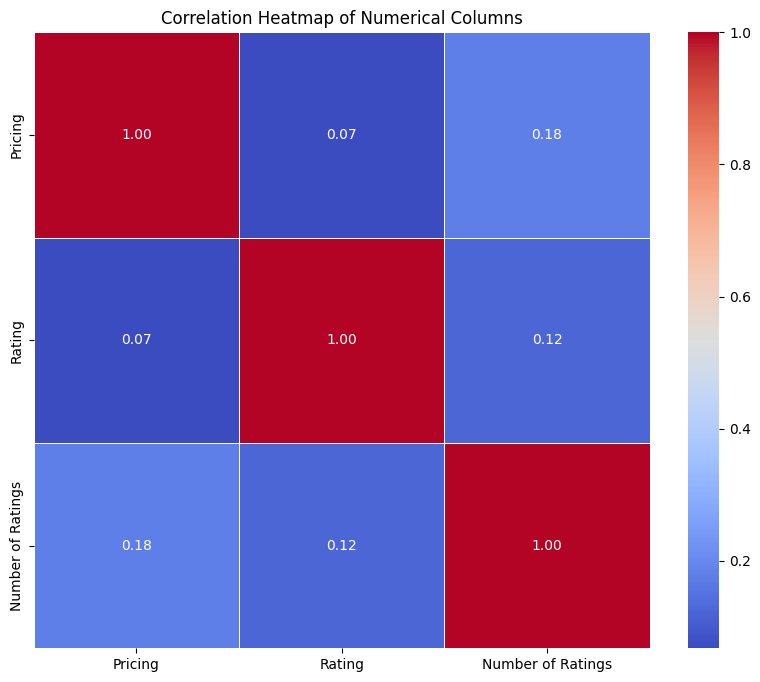

In [4]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

A correlation heatmap visualizes the correlation between numerical variables. In this case, we're looking at the relationship between Pricing, Rating, and Number of Ratings.
- Weak Correlations: The heatmap suggests that there are no strong linear relationships between the three variables.
- Pricing and Ratings: The correlation between pricing and ratings is close to 0, implying that there's no significant linear relationship between the two. This suggests that a higher price doesn't necessarily lead to a higher or lower rating.
- Pricing and Number of Ratings: There's a slightly positive correlation between pricing and the number of ratings. This could indicate that higher-priced items might tend to have more reviews, possibly due to factors like visibility or target audience.
- Ratings and Number of Ratings: The correlation between ratings and the number of ratings is also relatively weak. This suggests that having more reviews doesn't necessarily lead to a higher average rating.

In [ ]:
# Select columns with numerical data types
numerical_columns = df.select_dtypes(include=[np.number]).columns

num_bins = 4

def bin_width_binning(column, num_bins):
    # Calculate minimum and maximum values of the column
    min_val = column.min()
    max_val = column.max()
    # Determine the width of each bin
    bin_width = (max_val - min_val) / num_bins
    bins = []
    # Assign each value to a bin based on bin width
    for value in column:
        bin_index = int((value - min_val) / bin_width)
        if bin_index == num_bins:
            bin_index -= 1
        bins.append(bin_index)
    return bins

# Apply bin_width_binning to each numerical column
for col in numerical_columns:
    df[f'{col}_bin_width'] = bin_width_binning(df[col], num_bins)

def bin_depth_binning(column, num_bins):
    # Sort the column values
    sorted_values = sorted(column)
    n = len(sorted_values)
    # Determine the size of each bin
    bin_size = n // num_bins
    bins = []
    # Assign each value to a bin based on sorted order
    for value in column:
        for i in range(num_bins):
            start = i * bin_size
            end = (i + 1) * bin_size if i != num_bins -1 else n
            if sorted_values[start] <= value <= sorted_values[end-1]:
                bins.append(i)
                break
    return bins

# Apply bin_depth_binning to each numerical column
for col in numerical_columns:
    df[f'{col}_bin_depth'] = bin_depth_binning(df[col], num_bins)

def k_means_binning(column, k, max_iterations=100):
    # Initialize centroids by randomly sampling k values from the column
    centroids = random.sample(list(column), k)
    for _ in range(max_iterations):
        clusters = {i: [] for i in range(k)}
        # Assign each value to the nearest centroid
        for value in column:
            distances = [abs(value - c) for c in centroids]
            min_index = distances.index(min(distances))
            clusters[min_index].append(value)
        new_centroids = []
        # Update centroids based on cluster means
        for i in range(k):
            if clusters[i]:
                new_centroids.append(sum(clusters[i]) / len(clusters[i]))
            else:
                new_centroids.append(centroids[i])
        # Check for convergence
        if new_centroids == centroids:
            break
        centroids = new_centroids
    bin_labels = {}
    # Assign bin labels based on clusters
    for i in range(k):
        for value in clusters[i]:
            bin_labels[value] = i
    return column.map(bin_labels)

# Apply k_means_binning to each numerical column
for col in numerical_columns:
    df[f'{col}_kmeans'] = k_means_binning(df[col], num_bins)

# Collect all binned column names
binned_columns = []
for col in numerical_columns:
    binned_columns.extend([
        f'{col}_bin_width',
        f'{col}_bin_depth',
        f'{col}_kmeans'
    ])

# Display the first few rows of the binned columns
display(df[binned_columns].head())

# Print statistics of binning for each numerical column
for col in numerical_columns:
    print(f"\nStatistics for binning column '{col}':")
    print("Bin-Width:")
    print(df[f'{col}_bin_width'].value_counts().sort_index())
    print("\nBin-Depth:")
    print(df[f'{col}_bin_depth'].value_counts().sort_index())
    print("\nK-Means:")
    print(df[f'{col}_kmeans'].value_counts().sort_index())

,Pricing_bin_width,Pricing_bin_depth,Pricing_kmeans,Rating_bin_width,Rating_bin_depth,Rating_kmeans,Number of Ratings_bin_width,Number of Ratings_bin_depth,Number of Ratings_kmeans
0,0,1,1,2,0,1,0,2,0
1,0,3,2,2,0,1,0,2,0
2,0,0,1,1,0,2,0,0,0
3,0,0,1,1,0,2,0,0,0
4,0,0,1,1,0,2,0,0,0



Statistics for binning column 'Pricing':
Bin-Width:
Pricing_bin_width
0    61531
1       45
2      163
3        3
Name: count, dtype: int64

Bin-Depth:
Pricing_bin_depth
0    20732
1    10911
2    16017
3    14082
Name: count, dtype: int64

K-Means:
Pricing_kmeans
0    16170
1    38187
2     7217
3      168
Name: count, dtype: int64

Statistics for binning column 'Rating':
Bin-Width:
Rating_bin_width
0      934
1     4981
2    20530
3    35297
Name: count, dtype: int64

Bin-Depth:
Rating_bin_depth
0    16187
1    15656
2    14918
3    14981
Name: count, dtype: int64

K-Means:
Rating_kmeans
0    21691
1    13343
2     4731
3    21977
Name: count, dtype: int64

Statistics for binning column 'Number of Ratings':
Bin-Width:
Number of Ratings_bin_width
0    59844
1      772
2      338
3      788
Name: count, dtype: int64

Bin-Depth:
Number of Ratings_bin_depth
0    16144
1    14798
2    15381
3    15419
Name: count, dtype: int64

K-Means:
Number of Ratings_kmeans
0    57762
1     2422
2   

### Explain Code

1. **Selecting Numerical Columns**
    - **Purpose:** Identify and extract columns in the DataFrame that contain numerical data.
    - **Method:** 
        - Utilize the `select_dtypes` function from the pandas library.
        - Specify `include=[np.number]` to select columns with numerical data types.
    - **Usage:** The resulting list of column names (`numerical_columns`) is used in subsequent steps to apply binning techniques.

2. **Binning with Width**
    - **Purpose:** Divide the data within each numerical column into a specified number of bins based on their width.
    - **Method:**
        - Calculate the minimum and maximum values of the column.
        - Determine the width of each bin by dividing the range (max - min) by the number of bins (`num_bins`).
        - Assign each data point to a bin based on its position relative to the minimum value and the bin width.
    - **Usage:** Create a new column in the DataFrame for each numerical column, storing the bin assignments determined by this method.

3. **Binning with Depth**
    - **Purpose:** Divide the data within each numerical column into a specified number of bins based on the number of data points within each bin.
    - **Method:**
        - Sort the values in the column.
        - Divide the sorted data into `num_bins` groups, aiming for approximately equal numbers of data points in each bin.
        - Assign each data point to the corresponding bin based on its position within the sorted order.
    - **Usage:** Create a new column in the DataFrame for each numerical column, storing the bin assignments determined by this method.

4. **Binning with K-Means**
    - **Purpose:** Divide the data within each numerical column into a specified number of bins using the K-Means clustering algorithm.
    - **Method:**
        - Initialize `k` centroids randomly within the range of the column's values.
        - Iteratively assign each data point to the nearest centroid.
        - Recalculate the centroid positions based on the mean of the data points assigned to each cluster.
        - Repeat until the centroids converge or a maximum number of iterations is reached.
        - Assign a bin label to each data point based on the cluster it belongs to.
    - **Usage:** Create a new column in the DataFrame for each numerical column, storing the bin assignments determined by this method.

5. **Collecting and Displaying Results**
    - **Purpose:** Collect the names of all newly created binned columns and display the results.
    - **Method:**
        - Create a list (`binned_columns`) to store the names of all binned columns.
        - Display the first few rows of the DataFrame containing the binned columns.
        - Print the statistics of binning for each numerical column, including the frequency of data points in each bin for each binning method.


In [6]:
def min_max_scaling(column):
    # Scale the column values to a range between 0 and 1
    return (column - column.min()) / (column.max() - column.min())

def z_score_scaling(column):
    # Standardize the column values to have a mean of 0 and standard deviation of 1
    return (column - column.mean()) / column.std()

def robust_scaling(column):
    # Scale the column values using the median and interquartile range for robustness against outliers
    return (column - column.median()) / (column.quantile(0.75) - column.quantile(0.25))

def modified_z_score_scaling(column):
    # Apply modified Z-score scaling using median absolute deviation for better robustness
    median = column.median()
    mad = (column - median).abs().median()
    return 0.6745 * (column - median) / mad

# Apply Min-Max scaling to all numerical columns in the DataFrame
df_min_max_scaled = df[numerical_columns].apply(min_max_scaling)

# Apply Z-Score scaling to all numerical columns in the DataFrame
df_z_score_scaled = df[numerical_columns].apply(z_score_scaling)

# Apply Robust scaling to all numerical columns in the DataFrame
df_robust_scaled = df[numerical_columns].apply(robust_scaling)

# Apply Modified Z-Score scaling to all numerical columns in the DataFrame
df_modified_z_score_scaled = df[numerical_columns].apply(modified_z_score_scaling)

# Display descriptive statistics and first few rows of the Min-Max scaled DataFrame
print("Min-Max Scaled DataFrame:")
print(df_min_max_scaled.describe())
print(df_min_max_scaled.head())

# Display descriptive statistics and first few rows of the Z-Score scaled DataFrame
print("\nZ-Score Scaled DataFrame:")
print(df_z_score_scaled.describe())
print(df_z_score_scaled.head())

# Display descriptive statistics and first few rows of the Robust scaled DataFrame
print("\nRobust Scaled DataFrame:")
print(df_robust_scaled.describe())
print(df_robust_scaled.head())

# Display descriptive statistics and first few rows of the Modified Z-Score scaled DataFrame
print("\nModified Z-Score Scaled DataFrame:")
print(df_modified_z_score_scaled.describe())
print(df_modified_z_score_scaled.head())

Min-Max Scaled DataFrame:
            Pricing        Rating  Number of Ratings
count  61742.000000  61742.000000       61742.000000
mean       0.025663      0.750362           0.030922
std        0.046669      0.179077           0.125870
min        0.000000      0.000000           0.000000
25%        0.000000      0.653061           0.000406
50%        0.013304      0.785714           0.001462
75%        0.033311      0.887755           0.007268
max        1.000000      1.000000           1.000000
    Pricing    Rating  Number of Ratings
0  0.009970  0.551020           0.002396
1  0.066656  0.602041           0.002152
2  0.000000  0.387755           0.000000
3  0.000000  0.367347           0.000000
4  0.000000  0.285714           0.000000

Z-Score Scaled DataFrame:
            Pricing        Rating  Number of Ratings
count  6.174200e+04  6.174200e+04       6.174200e+04
mean   3.901299e-17 -2.847143e-16       7.250201e-18
std    1.000000e+00  1.000000e+00       1.000000e+00
min   -5.499

### Explain Code

1. **Scaling Functions**
    - **`min_max_scaling(column)`:**
        - **Purpose:** Scales the values in the input column to a range between 0 and 1.
        - **Method:** 
            - Calculates the minimum and maximum values of the column.
            - Applies the following formula to each value: 
                `(value - min) / (max - min)`
    - **`z_score_scaling(column)`:**
        - **Purpose:** Standardizes the values in the input column to have a mean of 0 and a standard deviation of 1.
        - **Method:** 
            - Calculates the mean and standard deviation of the column.
            - Applies the following formula to each value: 
                `(value - mean) / standard deviation`
    - **`robust_scaling(column)`:**
        - **Purpose:** Scales the values in the input column using the median and interquartile range (IQR) to be more robust to outliers.
        - **Method:** 
            - Calculates the median and IQR (75th percentile - 25th percentile) of the column.
            - Applies the following formula to each value: 
                `(value - median) / IQR`
    - **`modified_z_score_scaling(column)`:**
        - **Purpose:** Scales the values in the input column using the median and Median Absolute Deviation (MAD) for improved robustness against outliers.
        - **Method:** 
            - Calculates the median and MAD of the column.
            - Applies the following formula to each value: 
                `0.6745 * (value - median) / MAD` 

2. **Applying Scaling Techniques**
    - **`df[numerical_columns].apply(min_max_scaling)`:** 
        - Applies the `min_max_scaling` function to each numerical column in the DataFrame.
        - Creates a new DataFrame (`df_min_max_scaled`) containing the Min-Max scaled values.
    - **`df[numerical_columns].apply(z_score_scaling)`:** 
        - Applies the `z_score_scaling` function to each numerical column in the DataFrame.
        - Creates a new DataFrame (`df_z_score_scaled`) containing the Z-Score scaled values.
    - **`df[numerical_columns].apply(robust_scaling)`:** 
        - Applies the `robust_scaling` function to each numerical column in the DataFrame.
        - Creates a new DataFrame (`df_robust_scaled`) containing the Robust scaled values.
    - **`df[numerical_columns].apply(modified_z_score_scaling)`:** 
        - Applies the `modified_z_score_scaling` function to each numerical column in the DataFrame.
        - Creates a new DataFrame (`df_modified_z_score_scaled`) containing the Modified Z-Score scaled values.

3. **Displaying Results**
    - For each scaled DataFrame:
        - Prints the descriptive statistics (e.g., mean, standard deviation, min, max) using `describe()`.
        - Displays the first few rows of the scaled DataFrame.


In [7]:
df['Rating_minmax_scaled'] = min_max_scaling(df['Rating'])
df['Pricing_robust_scaled'] = robust_scaling(df['Pricing'])
df['Number of Ratings_robust_scaled'] = robust_scaling(df['Number of Ratings'])

print("Scaled DataFrame:")
print(df[['Rating_minmax_scaled', 'Pricing_robust_scaled', 'Number of Ratings_robust_scaled']].describe())
print(df[['Rating_minmax_scaled', 'Pricing_robust_scaled', 'Number of Ratings_robust_scaled']].head())

Scaled DataFrame:
       Rating_minmax_scaled  Pricing_robust_scaled  \
count          61742.000000           61742.000000   
mean               0.750362               0.371008   
std                0.179077               1.400990   
min                0.000000              -0.399399   
25%                0.653061              -0.399399   
50%                0.785714               0.000000   
75%                0.887755               0.600601   
max                1.000000              29.620621   

       Number of Ratings_robust_scaled  
count                     61742.000000  
mean                          4.293194  
std                          18.342751  
min                          -0.213018  
25%                          -0.153846  
50%                           0.000000  
75%                           0.846154  
max                         145.514793  
   Rating_minmax_scaled  Pricing_robust_scaled  \
0              0.551020              -0.100100   
1              0.602041   

In [8]:
# Select columns with numerical data types
numerical_columns = df.select_dtypes(include=[np.number]).columns

num_bins = 4

def bin_width_binning(column, num_bins):
    # Calculate minimum and maximum values of the column
    min_val = column.min()
    max_val = column.max()
    # Determine the width of each bin
    bin_width = (max_val - min_val) / num_bins
    bins = []
    # Assign each value to a bin based on bin width
    for value in column:
        bin_index = int((value - min_val) / bin_width)
        if bin_index == num_bins:
            bin_index -= 1
        bins.append(bin_index)
    return bins

# Apply bin_width_binning to each numerical column
for col in numerical_columns:
    df[f'{col}_bin_width'] = bin_width_binning(df[col], num_bins)

def bin_depth_binning(column, num_bins):
    # Sort the column values
    sorted_values = sorted(column)
    n = len(sorted_values)
    # Determine the size of each bin
    bin_size = n // num_bins
    bins = []
    # Assign each value to a bin based on sorted order
    for value in column:
        for i in range(num_bins):
            start = i * bin_size
            end = (i + 1) * bin_size if i != num_bins -1 else n
            if sorted_values[start] <= value <= sorted_values[end-1]:
                bins.append(i)
                break
    return bins

# Apply bin_depth_binning to each numerical column
for col in numerical_columns:
    df[f'{col}_bin_depth'] = bin_depth_binning(df[col], num_bins)

def k_means_binning(column, k, max_iterations=100):
    # Initialize centroids by randomly sampling k values from the column
    centroids = random.sample(list(column), k)
    for _ in range(max_iterations):
        clusters = {i: [] for i in range(k)}
        # Assign each value to the nearest centroid
        for value in column:
            distances = [abs(value - c) for c in centroids]
            min_index = distances.index(min(distances))
            clusters[min_index].append(value)
        new_centroids = []
        # Update centroids based on cluster means
        for i in range(k):
            if clusters[i]:
                new_centroids.append(sum(clusters[i]) / len(clusters[i]))
            else:
                new_centroids.append(centroids[i])
        # Check for convergence
        if new_centroids == centroids:
            break
        centroids = new_centroids
    bin_labels = {}
    # Assign bin labels based on clusters
    for i in range(k):
        for value in clusters[i]:
            bin_labels[value] = i
    return column.map(bin_labels)

# Apply k_means_binning to each numerical column
for col in numerical_columns:
    df[f'{col}_kmeans'] = k_means_binning(df[col], num_bins)

# Collect all binned column names
binned_columns = []
for col in numerical_columns:
    binned_columns.extend([
        f'{col}_bin_width',
        f'{col}_bin_depth',
        f'{col}_kmeans'
    ])

# Display the first few rows of the binned columns
display(df[binned_columns].head())

# Print statistics of binning for each numerical column
for col in numerical_columns:
    print(f"\nStatistics for binning column '{col}':")
    print("Bin-Width:")
    print(df[f'{col}_bin_width'].value_counts().sort_index())
    print("\nBin-Depth:")
    print(df[f'{col}_bin_depth'].value_counts().sort_index())
    print("\nK-Means:")
    print(df[f'{col}_kmeans'].value_counts().sort_index())

,Pricing_bin_width,Pricing_bin_depth,Pricing_kmeans,Rating_bin_width,Rating_bin_depth,Rating_kmeans,Number of Ratings_bin_width,Number of Ratings_bin_depth,Number of Ratings_kmeans,Pricing_bin_width_bin_width,...,Number of Ratings_kmeans_kmeans,Rating_minmax_scaled_bin_width,Rating_minmax_scaled_bin_depth,Rating_minmax_scaled_kmeans,Pricing_robust_scaled_bin_width,Pricing_robust_scaled_bin_depth,Pricing_robust_scaled_kmeans,Number of Ratings_robust_scaled_bin_width,Number of Ratings_robust_scaled_bin_depth,Number of Ratings_robust_scaled_kmeans
0,0,1,3,2,0,1,0,2,3,0,...,1,2,0,1,0,1,2,0,2,0
1,0,3,2,2,0,1,0,2,3,0,...,1,2,0,1,0,3,3,0,2,0
2,0,0,3,1,0,3,0,0,3,0,...,1,1,0,0,0,0,2,0,0,0
3,0,0,3,1,0,3,0,0,3,0,...,1,1,0,0,0,0,2,0,0,0
4,0,0,3,1,0,3,0,0,3,0,...,1,1,0,0,0,0,2,0,0,0



Statistics for binning column 'Pricing':
Bin-Width:
Pricing_bin_width
0    61531
1       45
2      163
3        3
Name: count, dtype: int64

Bin-Depth:
Pricing_bin_depth
0    20732
1    10911
2    16017
3    14082
Name: count, dtype: int64

K-Means:
Pricing_kmeans
0    16170
1      168
2     7217
3    38187
Name: count, dtype: int64

Statistics for binning column 'Rating':
Bin-Width:
Rating_bin_width
0      934
1     4981
2    20530
3    35297
Name: count, dtype: int64

Bin-Depth:
Rating_bin_depth
0    16187
1    15656
2    14918
3    14981
Name: count, dtype: int64

K-Means:
Rating_kmeans
0    20496
1    14295
2    22220
3     4731
Name: count, dtype: int64

Statistics for binning column 'Number of Ratings':
Bin-Width:
Number of Ratings_bin_width
0    59844
1      772
2      338
3      788
Name: count, dtype: int64

Bin-Depth:
Number of Ratings_bin_depth
0    16144
1    14798
2    15381
3    15419
Name: count, dtype: int64

K-Means:
Number of Ratings_kmeans
0      740
1     2422
2   

### Explain Code

**1. Selecting Numerical Columns**
  - **Purpose:** Identifies and extracts columns from the DataFrame that contain numerical data.
  - **Method:** 
    - Employs the `select_dtypes` function from the pandas library.
    - Specifies `include=[np.number]` to select columns with numerical data types.
  - **Usage:** The resulting list of column names (`numerical_columns`) is utilized in subsequent steps to apply binning techniques.

**2. Binning by Width**
  - **Purpose:** Divides the data within each numerical column into a specified number of bins based on the width of each bin.
  - **Method:**
    - Calculates the minimum and maximum values of the column.
    - Determines the width of each bin by dividing the range (max - min) by the number of bins (`num_bins`).
    - Assigns each data point to a bin based on its position relative to the minimum value and the bin width.
  - **Usage:** Creates a new column in the DataFrame for each numerical column, storing the bin assignments determined by this method.

**3. Binning by Depth**
  - **Purpose:** Divides the data within each numerical column into a specified number of bins with approximately equal numbers of data points in each bin.
  - **Method:**
    - Sorts the values in the column.
    - Divides the sorted data into `num_bins` groups, aiming for approximately equal numbers of data points in each bin.
    - Assigns each data point to the corresponding bin based on its position within the sorted order.
  - **Usage:** Creates a new column in the DataFrame for each numerical column, storing the bin assignments determined by this method.

**4. Binning using K-Means Clustering**
  - **Purpose:** Divides the data within each numerical column into a specified number of bins using the K-Means clustering algorithm.
  - **Method:**
    - Initializes `k` cluster centroids randomly within the range of the column's values.
    - Iteratively assigns each data point to the nearest centroid.
    - Recalculates the centroid positions based on the mean of the data points assigned to each cluster.
    - Repeats until the centroids converge or a maximum number of iterations is reached.
    - Assigns a bin label to each data point based on the cluster it belongs to.
  - **Usage:** Creates a new column in the DataFrame for each numerical column, storing the bin assignments determined by this method.

**5. Collecting and Displaying Results**
  - **Purpose:** Collects the names of all newly created binned columns and displays the results.
  - **Method:**
    - Creates a list (`binned_columns`) to store the names of all binned columns.
    - Displays the first few rows of the DataFrame containing the binned columns.
    - Prints the statistics of binning for each numerical column, including the frequency of data points in each bin for each binning method.
